## File and Data Field Descriptions
* ```train.csv``` - Personal records for about two-thirds (~8700) of the pas sengers, to be used as training data.
  * ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  * ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
  * ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  * ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  * ```Destination``` - The planet the passenger will be debarking to.
  * ```Age``` - The age of the passenger.
  * ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
  * ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  * ```Name``` - The first and last names of the passenger.
  * ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
  * ```test.csv``` - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
  * ```sample_submission.csv``` - A submission file in the correct format.
  * ```PassengerId``` - Id for each passenger in the test set.
  * ```Transported``` - The target. For each passenger, predict either True or False.

In [3]:
!pip install kaggle

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!echo "{\"username\":\"ahmedkmetwally\",\"key\":\"5c92b843c4f5a283aeb3a689c2c99106\"}" > /root/.kaggle/kaggle.json

In [7]:
import kaggle
kaggle.api.authenticate()

In [8]:
# Make call to list competitions, format the response, and return a list of Competition instances
competitions = kaggle.api.competitions_list()

# Print the name and ID of each competition
for competition in competitions:
    print(f"{competition.ref}: {competition.title}")

https://www.kaggle.com/competitions/nfl-player-contact-detection: 1st and Future - Player Contact Detection
https://www.kaggle.com/competitions/nfl-big-data-bowl-2023: NFL Big Data Bowl 2023
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting: GoDaddy - Microbusiness Density Forecasting
https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations: Learning Equality - Curriculum Recommendations
https://www.kaggle.com/competitions/santa-2022: Santa 2022 - The Christmas Card Conundrum
https://www.kaggle.com/competitions/rsna-breast-cancer-detection: RSNA Screening Mammography Breast Cancer Detection
https://www.kaggle.com/competitions/otto-recommender-system: OTTO – Multi-Objective Recommender System
https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction: Novozymes Enzyme Stability Prediction
https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves: G2Net Detecting Continuous Gravitational Waves
htt

In [9]:
kaggle.api.competition_download_files("spaceship-titanic", path=".")

In [10]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [36]:
# All the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
# Read the CSV file and store it in a dataframe 
df_train=pd.read_csv('train.csv')

In [13]:
# Print the first five rows of the DataFrame
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
# This line of code is splitting the "Cabin" column of the dataframe into three new columns: 'deck', 'num', 'side'. 
df_train[['deck', 'num', 'side']] = df_train['Cabin'].str.split('/', expand=True)
# The expand=True parameter tells pandas to create a new column for each split value.

In [29]:
# Print the number of rows and columns
df_train[['Cabin', 'deck', 'num', 'side']].head()

,Cabin,deck,num,side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [30]:
# Print the data types of each column
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
deck             object
num              object
side             object
dtype: object

In [16]:
# Print the number of missing values in each column
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
# Print a summary of the statistical properties of each numeric column
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


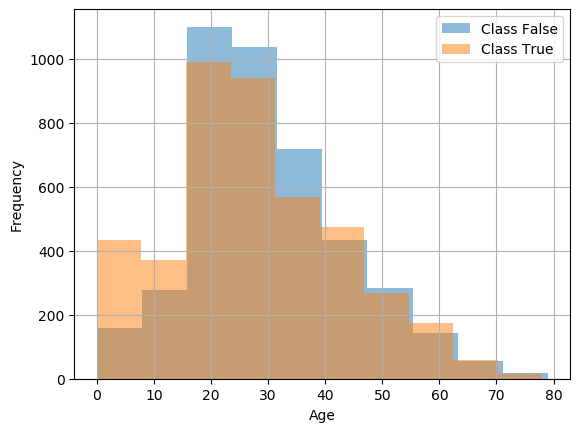

In [19]:
# The below code will create a histogram showing the distribution of the attribute_name attribute for each class in the target attribute.

# Select the attribute to visualize
attribute = 'Age'

# Create a histogram of the attribute for each class
df_train[df_train['Transported'] == False][attribute].hist(alpha=0.5, label='Class False')
df_train[df_train['Transported'] == True][attribute].hist(alpha=0.5, label='Class True')

# Add a legend and label the axes
plt.legend()
plt.xlabel(attribute)
plt.ylabel('Frequency')

# Show the plot
plt.show()

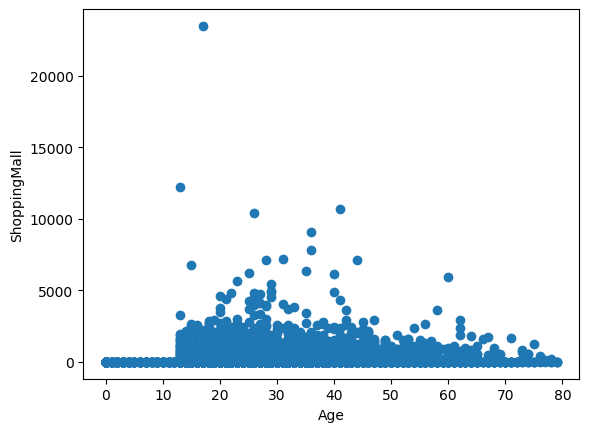

In [20]:
# Select the attributes to visualize
x_attribute = 'Age'
y_attribute = 'ShoppingMall'

# Create a scatter plot of the attributes
plt.scatter(df_train[x_attribute], df_train[y_attribute])

# Label the axes
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)

# Show the plot
plt.show()

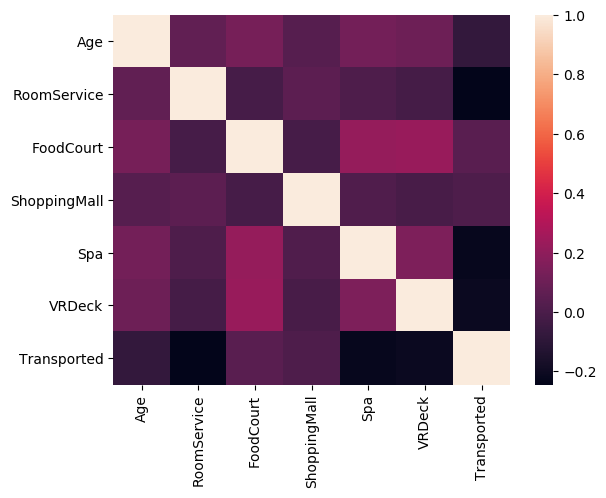

In [33]:
# Compute the correlation matrix
corr = df_train.corr()

# Create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Show the plot
plt.show()

#### Clean and preprocess the data: Next is cleaning and preprocessing the data to prepare it for analysis. This may include handling missing or null values, converting data types, and scaling numeric attributes.

* Handling missing or null values
* Converting data types
* Scaling numeric attributes

##### When the attributes have very different ranges of values, this can lead to some attributes dominating the model, since their values will be much larger than the values of other attributes.
##### So in this step, it is required to do the following:
* Select the numerical attributes
* Fillin the nulls
* Standardize the range and distribution of numeric attributes if applicable.

In [41]:
# Select all numeric columns
numeric_df = df_train.select_dtypes(include=['float', 'int'])

In [47]:
numeric_df.isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

* ```test.csv``` - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

In [ ]:
df_test=pd.read_csv('')